In [16]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt

In [17]:
def plot_result(result,start_from=1,period=17,insert_index=6,time_start=-7,file_name="result",title="Event Study Coefficients with Confidence Intervals"):
    summary_table=pd.DataFrame(result.summary.tables[1].data[start_from:start_from+period],columns=result.summary.tables[1].data[0])
    new_row=[0]*len(summary_table.columns)
    # insert_index = 4
    summary_table = pd.concat([summary_table.iloc[:insert_index], pd.DataFrame([new_row],columns=summary_table.columns), summary_table.iloc[insert_index:]]).reset_index(drop=True)

    summary_table["Time"]=np.array(list(range(time_start,period+time_start+1)))
    # make each column of summary_table numeric
    summary_table=summary_table.apply(pd.to_numeric, errors='ignore')
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed

    # Plot coefficients as points
    plt.plot(summary_table['Time'], summary_table["Parameter"], 'o-', label='Coefficients', color='b')

    # Plot confidence intervals as error bars
    # plt.errorbar(summary_table['Time'], summary_table["Parameter"],
    #              yerr=[summary_table["Parameter"] - summary_table['Lower CI'],
    #                    summary_table['Upper CI'] - summary_table["Parameter"]],
    #              fmt='none', ecolor='orange', elinewidth=2, capsize=4, label='Confidence Intervals')

    plt.fill_between(summary_table['Time'], summary_table['Lower CI'], summary_table['Upper CI'], color='orange', alpha=0.3, label='Confidence Intervals')

    plt.xlabel('Time')
    # Set y-axis properties
    plt.ylim(-1.5, 1.5)  # Set the y-axis limits
    plt.ylabel("Parameter")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.savefig("./plots/{}.png".format(file_name),dpi=300,bbox_inches="tight",transparent=False,facecolor="white")
    plt.show()
    # return summary_table

In [18]:
df=pd.read_csv("../../data/merged/len4_ndb_agg_in_oral_DropNever.csv",encoding="shift-jis",index_col=0)

In [19]:
df["year_trend"]=df["year"]-2014
df=df.loc[df["総計"]>0]
df=df.loc[df["revenue"]>0]
df["log_quantity"]=np.log(df["総計"])
df["log_revenue"]=np.log(df["revenue"])
df_generic=df.copy()
df_branded=df.copy()
df_branded=df_branded.loc[df_branded["後発品区分"]==0]
df_generic=df_generic.loc[df_generic["後発品区分"]==1]
df_branded=df_branded.set_index(["id","year"])
df_generic=df_generic.set_index(["id","year"])
df=df.set_index(["id","year"])
df_branded=PanelData(df_branded,convert_dummies=False)
df_generic=PanelData(df_generic,convert_dummies=False)
df=PanelData(df,convert_dummies=False)

                              Parameter Estimates                              
             Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-------------------------------------------------------------------------------
elasped_m7      0.3428     0.3217     1.0654     0.2868     -0.2883      0.9739
elasped_m6     -0.0775     0.1316    -0.5887     0.5561     -0.3355      0.1806
elasped_m5      0.1909     0.1835     1.0402     0.2984     -0.1691      0.5509
elasped_m4      0.0435     0.1719     0.2532     0.8001     -0.2937      0.3807
elasped_m3      0.2006     0.1441     1.3921     0.1641     -0.0820      0.4832
elasped_m2      0.0966     0.1706     0.5660     0.5715     -0.2381      0.4312
elasped_m1      0.2616     0.1800     1.4532     0.1464     -0.0915      0.6147
elasped_0       0.0040     0.1568     0.0257     0.9795     -0.3035      0.3116
elasped_1       0.2994     0.1469     2.0381     0.0417      0.0113      0.5875
elasped_2       0.0147     0.1299     0.

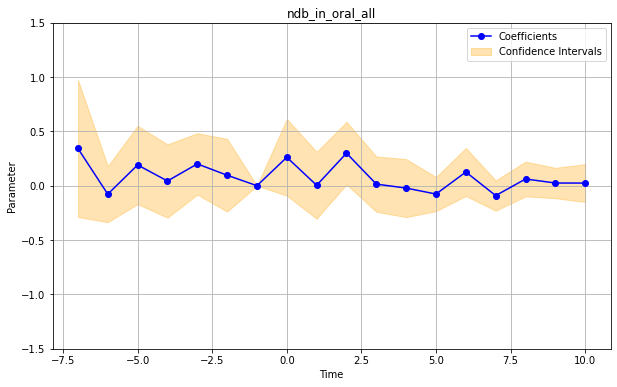

In [20]:
# all data
# period: 15
formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+後発品区分+oral+in_hospital+TimeEffects+EntityEffects"
# period:20
# formula="log_quantity~ elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+後発品区分+oral+in_hospital+TimeEffects+EntityEffects"
# year trend
# formula+="+"+"year_trend"
# generic_per
formula+="+"+"generic_per"
mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe, file_name="ndb_in_oral_all",title="ndb_in_oral_all",period=15)
plot_result(res_fe, file_name="ndb_in_oral_all",title="ndb_in_oral_all")

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.3431
Estimator:                   PanelOLS   R-squared (Between):             -0.2530
No. Observations:                 747   R-squared (Within):              -2.5088
Date:                Wed, Sep 06 2023   R-squared (Overall):             -0.7009
Time:                        08:46:52   Log-likelihood                   -1107.5
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      17.708
Entities:                          42   P-value                           0.0000
Avg Obs:                       17.786   Distribution:                  F(20,678)
Min Obs:                       6.0000                                           
Max Obs:                       32.000   F-statistic (robust):          2.727e+07
                            

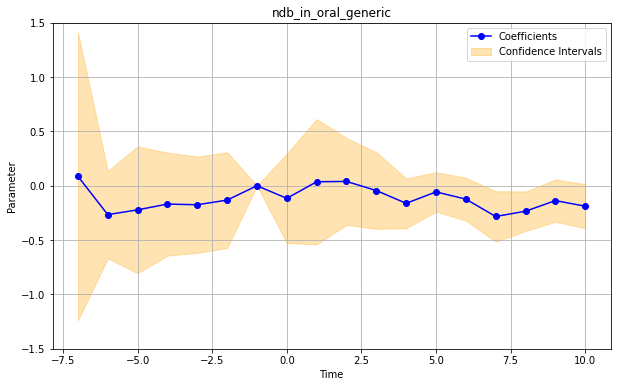

In [21]:
# generic data
formula="log_quantity~elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+oral+in_hospital+TimeEffects+EntityEffects"

# period:20
# formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+oral+in_hospital+TimeEffects+EntityEffects"
# year trend
# formula+="+"+"year_trend"
# generic_per
formula+="+"+"generic_per"

mod_fe=PanelOLS.from_formula(formula, data=df_generic,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe, file_name="ndb_in_oral_generic",title="ndb_in_oral_generic",period=15)
plot_result(res_fe, file_name="ndb_in_oral_generic",title="ndb_in_oral_generic")

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.3995
Estimator:                   PanelOLS   R-squared (Between):             -0.2167
No. Observations:                 937   R-squared (Within):              -1.4344
Date:                Wed, Sep 06 2023   R-squared (Overall):             -0.6655
Time:                        08:46:52   Log-likelihood                   -1634.2
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      28.842
Entities:                          43   P-value                           0.0000
Avg Obs:                       21.791   Distribution:                  F(20,867)
Min Obs:                       14.000                                           
Max Obs:                       32.000   F-statistic (robust):          5.141e+07
                            

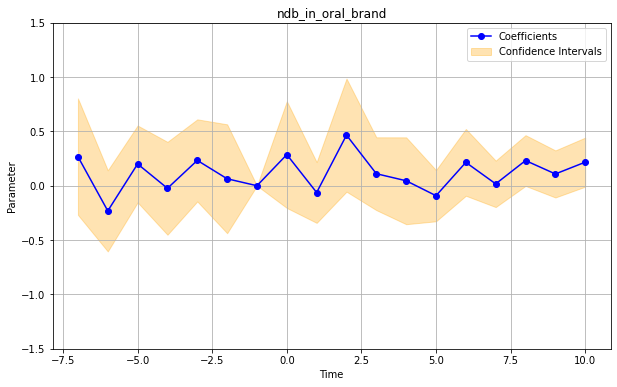

In [22]:
# branded data
formula="log_quantity~ oral+in_hospital+elasped_m7+elasped_m6+elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+TimeEffects+EntityEffects"

# period:20
# formula="log_quantity~ elasped_m5+elasped_m4+elasped_m3+elasped_m2+elasped_m1+elasped_0+elasped_1+elasped_2+elasped_3+elasped_4+elasped_5+elasped_6+elasped_7+elasped_8+elasped_9+elasped_10+elasped_11+elasped_12+elasped_13+elasped_14+elasped_15+oral+in_hospital+TimeEffects+EntityEffects"

# year trend
# formula+="+"+"year_trend"
# generic_per
formula+="+"+"generic_per"

mod_fe=PanelOLS.from_formula(formula, data=df_branded,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe, file_name="ndb_in_oral_generic",title="ndb_in_oral_generic",period=15)
plot_result(res_fe, file_name="ndb_in_oral_brand",title="ndb_in_oral_brand",start_from=3)